# Translations

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread("goku.jpeg")

In [2]:
h, w = image.shape[:2]

half_height, half_width = h//4, w//8

In [3]:
transition_matrix = np.float32([[1, 0, half_width],
                               [0, 1, half_height]])

print(transition_matrix)

[[ 1.  0. 50.]
 [ 0.  1. 75.]]


In [4]:
img_transition = cv.warpAffine(image, transition_matrix, (w, h))
print(img_transition.shape)

(300, 400, 3)


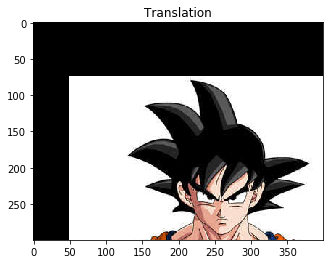

In [5]:
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()

# Rotations

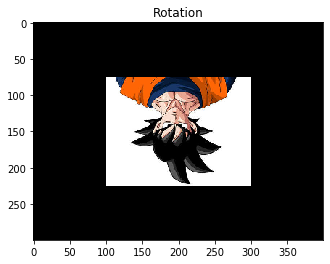

In [6]:
rotation_matrix = cv.getRotationMatrix2D((w/2,h/2), -180, 0.5)

rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

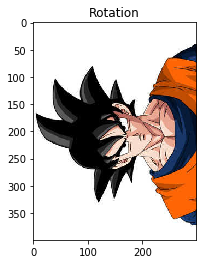

In [7]:
# We can also rotate our images with transpose

rotated_image = cv.transpose(image)
plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()

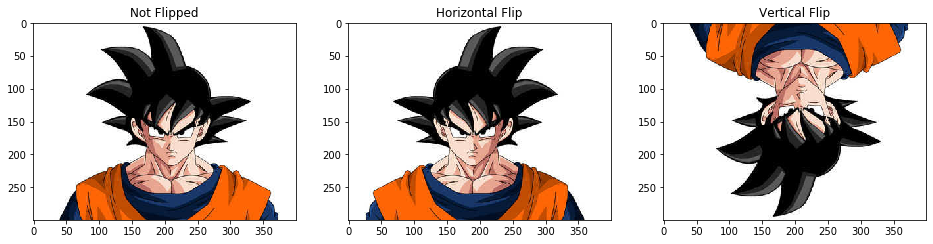

In [8]:
## horizontal flip
flipped_1 = cv.flip(image, 1)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Not Flipped')


ax[1].imshow(cv.cvtColor(flipped_1, cv.COLOR_BGR2RGB))
ax[1].set_title('Horizontal Flip')

# Verticle flipped
flipped_2 = cv.flip(image, 0)

ax[2].imshow(cv.cvtColor(flipped_2, cv.COLOR_BGR2RGB))
ax[2].set_title('Vertical Flip')

plt.show()

## Scaling, resizing and interpolations

Text(0.5, 1.0, 'Skewed Interpolation Scale')

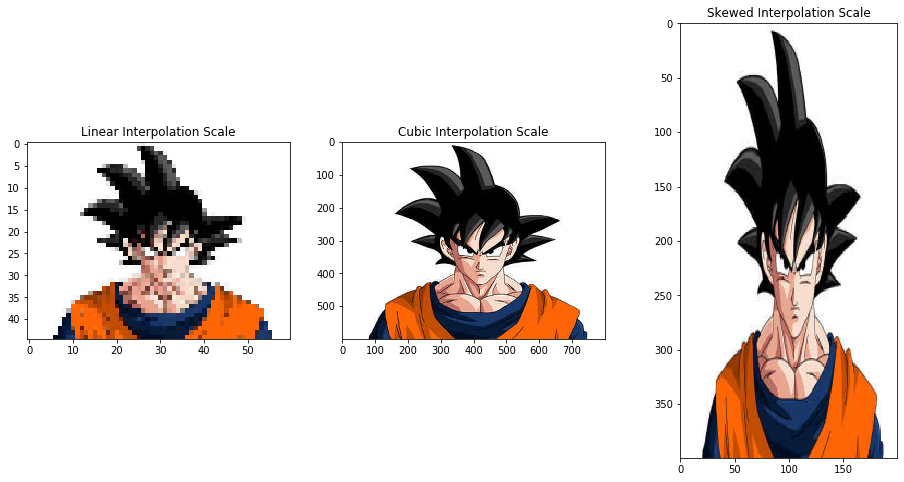

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

# image size being 0.15 times of it's original size
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15)
ax[0].imshow(cv.cvtColor(image_scaled, cv.COLOR_BGR2RGB))
ax[0].set_title("Linear Interpolation Scale")

# image size being 2 times of it's original size
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
ax[1].imshow(cv.cvtColor(image_scaled_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Cubic Interpolation Scale")

# image size being 0.15 times of it's original size
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA)
ax[2].imshow(cv.cvtColor(image_scaled_3, cv.COLOR_BGR2RGB))
ax[2].set_title("Skewed Interpolation Scale")

# Image Pyramids

In [10]:
smaller = cv.pyrDown(image)
larger = cv.pyrUp(image)

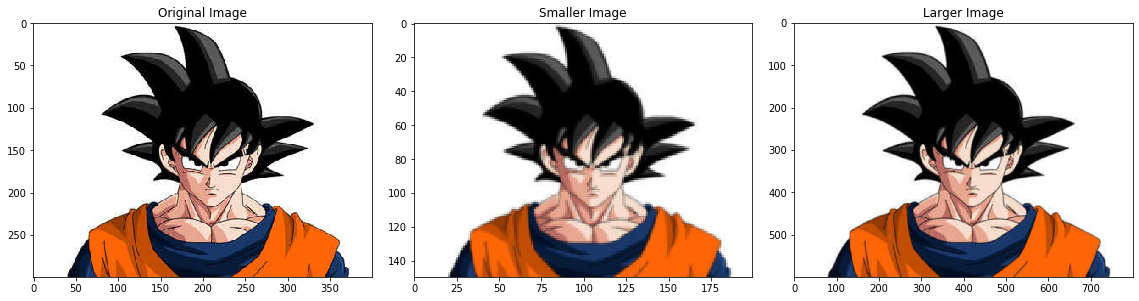

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(smaller, cv.COLOR_BGR2RGB))
ax[1].set_title("Smaller Image")

ax[2].imshow(cv.cvtColor(larger, cv.COLOR_BGR2RGB))
ax[2].set_title("Larger Image")

plt.show()

In [12]:
for i, j in ((larger, "larger"), (smaller, "smaller"), (image, "original")):
    print(f"image shape {j}:", i.shape)

image shape larger: (600, 800, 3)
image shape smaller: (150, 200, 3)
image shape original: (300, 400, 3)


## Cropping

In [13]:
h, w = image.shape[:2]

# top left of cropping rectangle
start_row, start_col = int(h*0.25), int(w*0.15)

# bottom right of cropping rectange
end_row, end_col = int(h*0.75), int(w*0.85)

cropped = image[start_row:end_row, start_col:end_col]

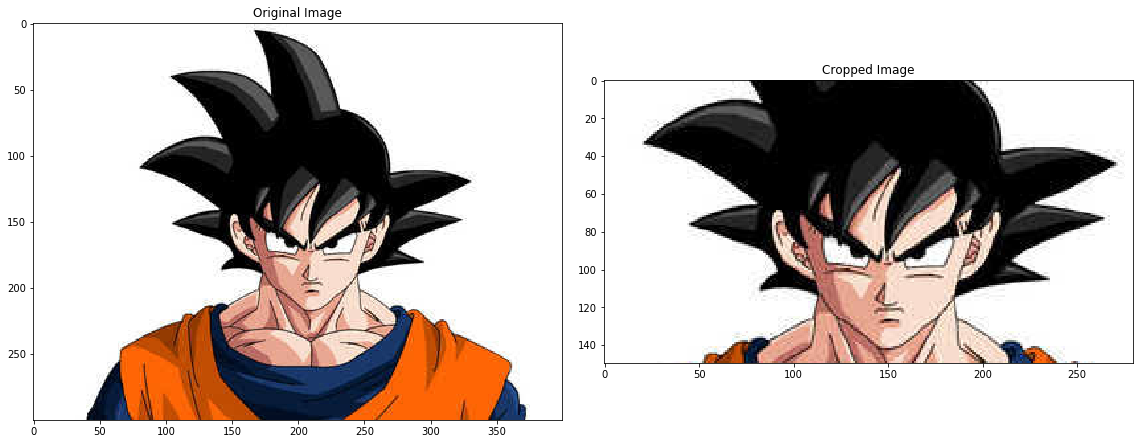

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(cropped, cv.COLOR_BGR2RGB))
ax[1].set_title("Cropped Image")

plt.show()

## Airthmetic operations

These operations allows us to increase or decrease the color intensity

In [15]:
M = np.ones(image.shape, dtype = "uint8") * 50

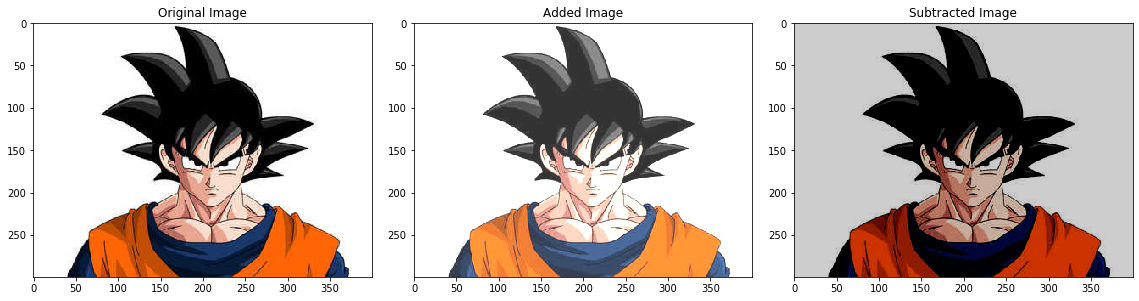

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

added = cv.add(image, M)
ax[1].imshow(cv.cvtColor(added, cv.COLOR_BGR2RGB))
ax[1].set_title("Added Image")

subtracted = cv.subtract(image, M)
ax[2].imshow(cv.cvtColor(subtracted, cv.COLOR_BGR2RGB))
ax[2].set_title("Subtracted Image")

plt.show()

# Bitwise operations and masking

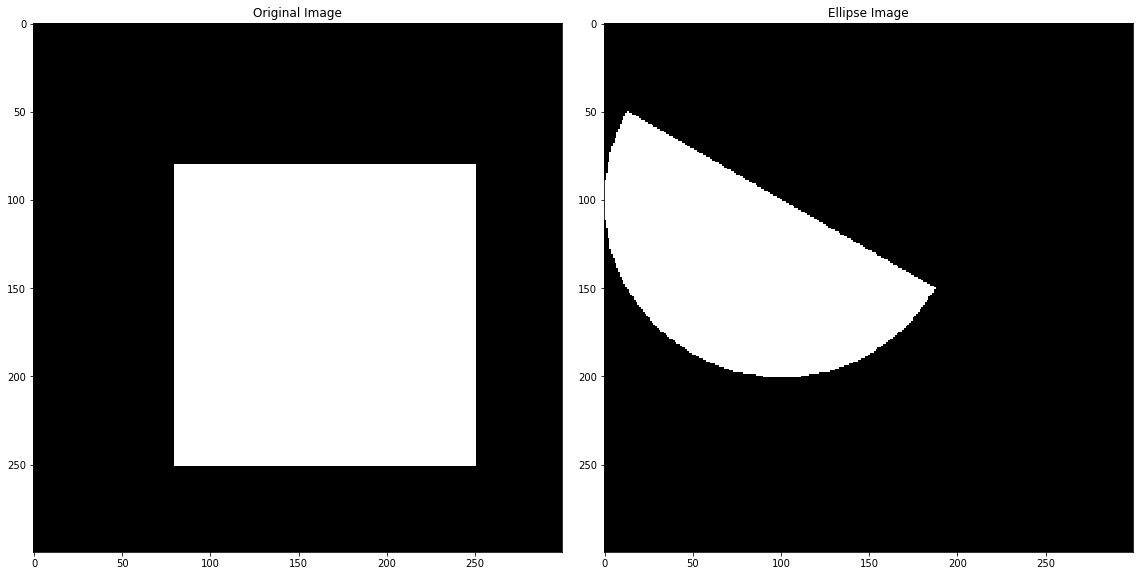

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()


# for grayscale image we don't have to add color channels
square = np.zeros((300, 300),np.uint8)
cv.rectangle(square, (80,80), (250, 250), 255, -2)
ax[0].imshow(cv.cvtColor(square, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

# Elipse
ellipse = np.zeros((300,300), np.uint8)
cv.ellipse(ellipse, (100, 100), (100, 100), 30, 0, 180, 255, -1)
ax[1].imshow(cv.cvtColor(ellipse, cv.COLOR_BGR2RGB))
ax[1].set_title("Ellipse Image")

plt.show()

## Bitwise operations

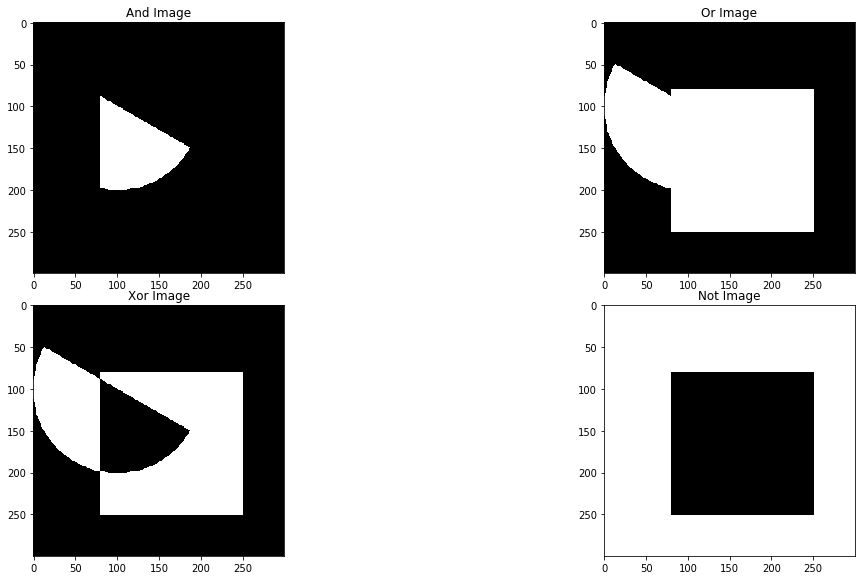

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout()

And = cv.bitwise_and(square, ellipse)
ax[0][0].imshow(cv.cvtColor(And, cv.COLOR_BGR2RGB))
ax[0][0].set_title("And Image")

Or = cv.bitwise_or(square, ellipse)
ax[0][1].imshow(cv.cvtColor(Or, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Or Image")

Xor = cv.bitwise_xor(square, ellipse)
ax[1][0].imshow(cv.cvtColor(Xor, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Xor Image")

Not = cv.bitwise_not(square, ellipse)
ax[1][1].imshow(cv.cvtColor(Not, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Not Image")

plt.show()

## Convolution and blurring

Text(0.5, 1.0, 'Original Image')

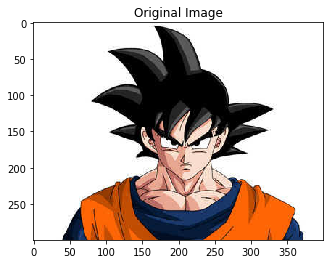

In [19]:
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Original Image")

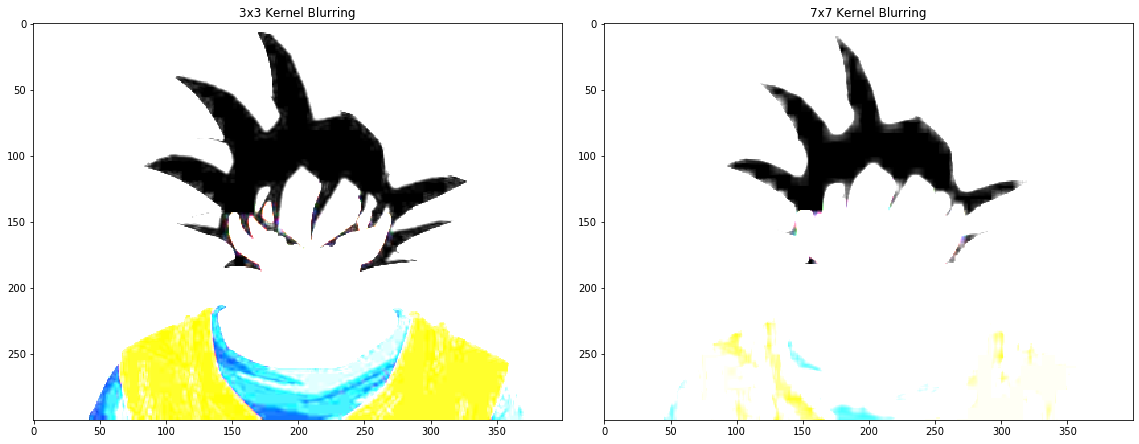

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

kernel_3x3 = np.ones((3, 3), np.float32)

# To conovolve the kernel on an image we can use cv.filter2D
blur = cv.filter2D(image, -1, kernel_3x3)
ax[0].imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
ax[0].set_title('3x3 Kernel Blurring')

kernel_7x7 = np.ones((7, 7), np.float32)
blur2 = cv.filter2D(image, -1, kernel_7x7)
ax[1].imshow(cv.cvtColor(blur2, cv.COLOR_BGR2RGB))
ax[1].set_title('7x7 Kernel Blurring')

plt.show()

# Other blurring methods

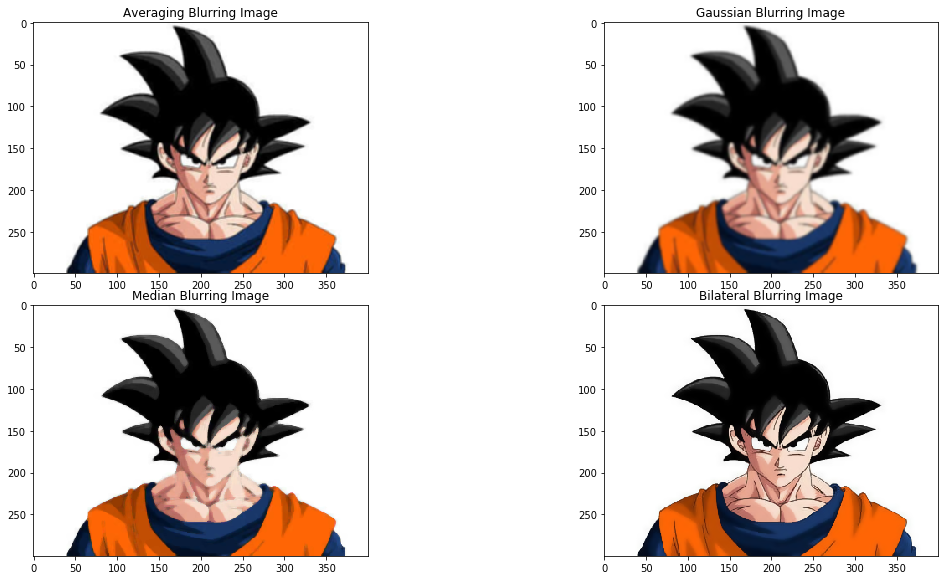

In [21]:
"""
Average Blurring: It is done by convolving the image with a normalized box filter.
This takes the pixels under the box and replaces the central element.

Gaussain Blurring: Takes Gaussian kernel instead of the box filter

Median Blurring: Takes the median of all the pixels under the kernel area and central
element is replaced with the median value

Bilateral Blurring: It is very effective in removing the noise from the image while keeping
the edges sharp.
"""

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout()

avg_blur = cv.blur(image, (3, 3))
ax[0][0].imshow(cv.cvtColor(avg_blur, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Averaging Blurring Image")

gaus_blur = cv.GaussianBlur(image, (7, 7), 0)
ax[0][1].imshow(cv.cvtColor(gaus_blur, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Gaussian Blurring Image")

med_blur =  cv.medianBlur(image, 5) 
ax[1][0].imshow(cv.cvtColor(med_blur, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Median Blurring Image")

bil_blur = cv.bilateralFilter(image, 9, 75, 75)
ax[1][1].imshow(cv.cvtColor(bil_blur, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Bilateral Blurring Image")

plt.show()

## Image De-noising

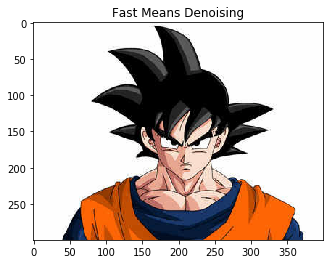

In [22]:
dst = cv.fastNlMeansDenoisingColored(image, None, 10, 10, 10, 0)

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.title("Fast Means Denoising")
plt.show()

# Sharpening

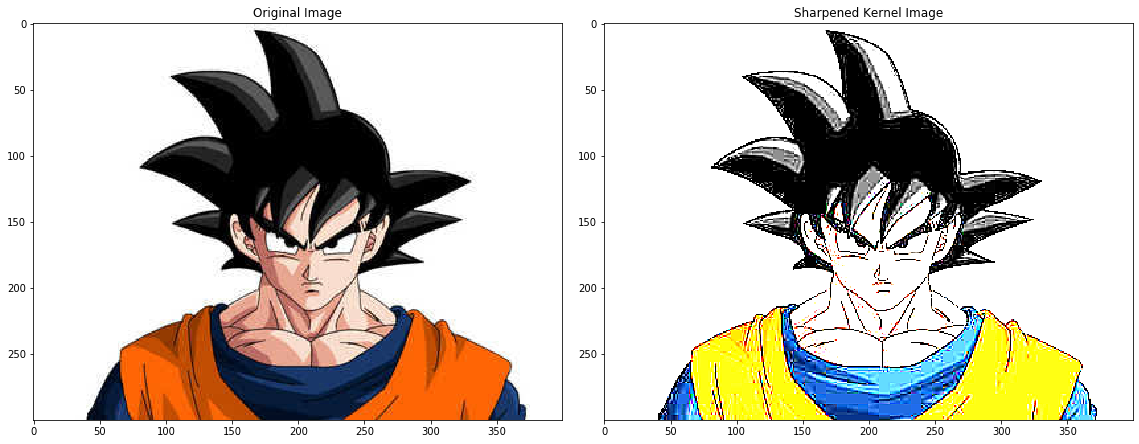

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()


# To conovolve the kernel on an image we can use cv.filter2D
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 12, -1],
                             [-1, -1, -1]])
sharpened = cv.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')

plt.show()

## Thresholding, Binarization and Adaptive Thresholding

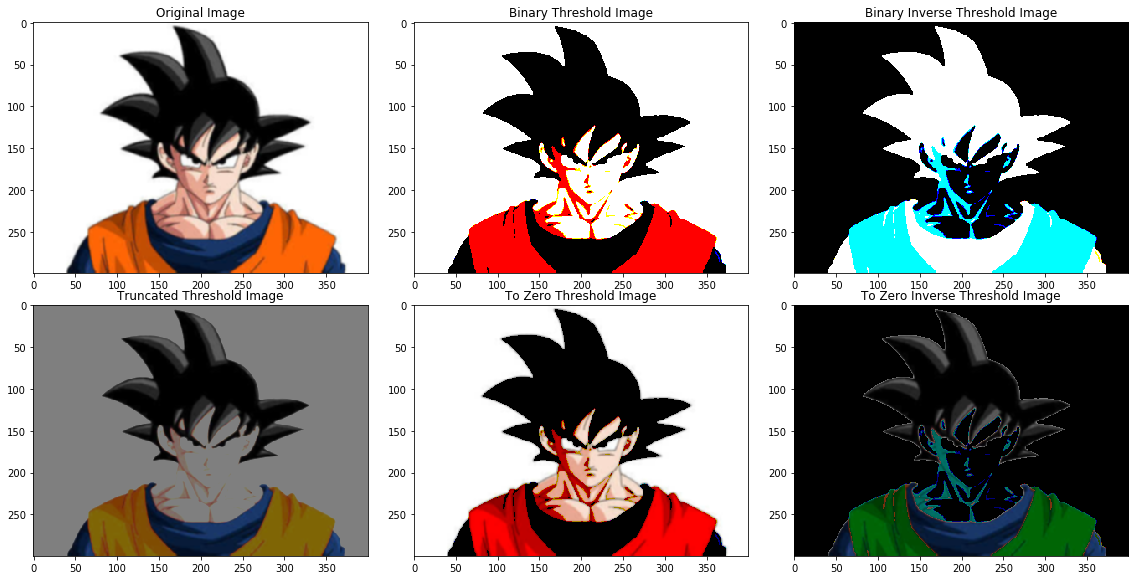

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
fig.tight_layout()

ax[0][0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0][0].set_title('Original Image')

#If pixel value is greater than a threshold value, it is assigned one value (may be white), 
# else it is assigned another value (may be black).

ret, thresh_image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
ax[0][1].imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
ax[0][1].set_title('Binary Threshold Image')


## Reverse of the above image
ret, thresh_image = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV)
ax[0][2].imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
ax[0][2].set_title('Binary Inverse Threshold Image')

##+++++++++++++++++++++++++++++++++++++++++++##

## Value above 127 will be truncated

ret, thresh_image = cv.threshold(image, 127, 255, cv.THRESH_TRUNC)
ax[1][0].imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
ax[1][0].set_title('Truncated Threshold Image')

## Values below 127 will be zero and above will remain unchanged
ret, thresh_image = cv.threshold(image, 127, 255, cv.THRESH_TOZERO)
ax[1][1].imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
ax[1][1].set_title('To Zero Threshold Image')

ret, thresh_image = cv.threshold(image, 127, 255, cv.THRESH_TOZERO_INV)
ax[1][2].imshow(cv.cvtColor(thresh_image, cv.COLOR_BGR2RGB))
ax[1][2].set_title('To Zero Inverse Threshold Image')

plt.show()

## Adaptive thresholding (Much better way than above methods)

In above methods we used a global value as a threshold value. But what if image has different lightining consitions in different areas. In that case we use adaptive thresholding.


What we do is, we calculate the threshold for a smaller region of the image, so we get different thresholds for different regions of the same image and it gives us better results.

### Note: We can use adaptive thresholding only on grayscale images.